In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
df = pd.read_excel('arquetipos.xlsx')

In [ ]:
df.sample(10)

,IDArquetipo,Arquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes,Status
534,1,ADMINISTRADOR,1,0,1,0,0,1,0,1,3
695,13,MESTRE,0,1,0,1,1,0,0,1,3
579,9,ENCANTADOR,0,1,1,0,1,0,1,0,3
605,12,LÍDER,1,0,1,0,1,0,0,1,3
413,11,IDEALISTA,0,1,0,1,1,0,1,0,2
443,16,VISIONÁRIO,1,0,1,0,1,0,1,0,2
494,9,ENCANTADOR,0,1,1,0,1,0,1,0,2
621,16,VISIONÁRIO,1,0,1,0,1,0,1,0,3
196,5,CIENTISTA,1,0,0,1,1,0,0,1,1
220,9,ENCANTADOR,0,1,1,0,1,0,1,0,1


In [ ]:
df.corr

<bound method DataFrame.corr of      IDArquetipo  Cerebro  Coracao  Aberto  ...  Fatos  Geral  Detalhes  Status
0              1        1        0       1  ...      1      0         1       1
1              1        1        0       1  ...      1      0         1       1
2              1        1        0       1  ...      1      0         1       1
3              1        1        0       1  ...      1      0         1       1
4              1        1        0       1  ...      1      0         1       1
..           ...      ...      ...     ...  ...    ...    ...       ...     ...
793           14        1        0       0  ...      1      0         1       3
794           15        0        1       0  ...      1      0         1       3
795           16        1        0       1  ...      0      1         0       3
796           16        1        0       1  ...      0      1         0       3
797           16        1        0       1  ...      0      1         0       3

[798 ro

In [ ]:
df.describe

<bound method NDFrame.describe of      IDArquetipo      Arquetipo  Cerebro  ...  Geral  Detalhes  Status
0              1  ADMINISTRADOR        1  ...      0         1       1
1              1  ADMINISTRADOR        1  ...      0         1       1
2              1  ADMINISTRADOR        1  ...      0         1       1
3              1  ADMINISTRADOR        1  ...      0         1       1
4              1  ADMINISTRADOR        1  ...      0         1       1
..           ...            ...      ...  ...    ...       ...     ...
793           14      REGULADOR        1  ...      0         1       3
794           15          TUTOR        0  ...      0         1       3
795           16     VISIONÁRIO        1  ...      1         0       3
796           16     VISIONÁRIO        1  ...      1         0       3
797           16     VISIONÁRIO        1  ...      1         0       3

[798 rows x 11 columns]>

In [ ]:
df.duplicated().sum()

751

In [ ]:
#transformar arquetipo em código, apenas para testar
#df['Arquetipo'] = df['Arquetipo'].astype('category').cat.codes
#df.sample(10)

,IDArquetipo,Arquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes,Status
191,4,3,0,1,1,0,0,1,1,0,1
222,9,8,0,1,1,0,1,0,1,0,1
447,1,0,1,0,1,0,0,1,0,1,2
517,14,13,1,0,0,1,0,1,0,1,2
52,10,9,1,0,1,0,0,1,1,0,1
205,7,6,0,1,1,0,1,0,0,1,1
173,16,15,1,0,1,0,1,0,1,0,1
619,16,15,1,0,1,0,1,0,1,0,3
541,2,1,1,0,0,1,1,0,1,0,3
554,6,5,0,1,1,0,0,1,0,1,3


In [ ]:
df = df.drop('Arquetipo', axis=1)

In [ ]:
df.sample(10)

,IDArquetipo,Cerebro,Coracao,Aberto,Fechado,Projecoes,Fatos,Geral,Detalhes,Status
245,14,1,0,0,1,0,1,0,1,1
3,1,1,0,1,0,0,1,0,1,1
255,15,0,1,0,1,0,1,0,1,1
643,6,0,1,1,0,0,1,0,1,3
329,12,1,0,1,0,1,0,0,1,2
305,9,0,1,1,0,1,0,1,0,2
524,16,1,0,1,0,1,0,1,0,2
113,7,0,1,1,0,1,0,0,1,1
731,6,0,1,1,0,0,1,0,1,3
779,12,1,0,1,0,1,0,0,1,3


In [ ]:
df1 = df[['IDArquetipo','Status']]

In [ ]:
df1.columns = ['Arquetipo', 'Tipo']

In [ ]:
df1.sample(10)

,Arquetipo,Tipo
607,13,3
140,10,1
448,1,2
125,9,1
63,14,1
355,16,2
395,9,2
477,8,2
162,15,1
465,6,2


In [ ]:
df1.shape

(798, 2)

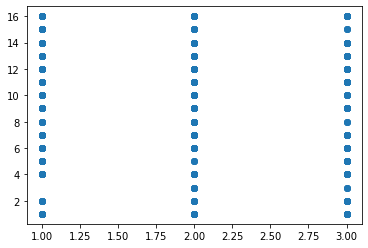

In [ ]:
plt.scatter(df1['Tipo'], df1['Arquetipo'])
plt.show()

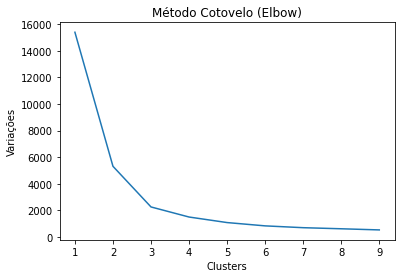

In [ ]:
variacoes = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df1)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,10), variacoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()

In [ ]:
kmeans_final = KMeans(n_clusters=3)

In [ ]:
kmeans_final.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_pred = kmeans_final.predict(df1)

In [ ]:
cluster_centers = kmeans_final.cluster_centers_

In [ ]:
cluster_centers

array([[ 8.3046875 ,  2.09375   ],
       [14.21428571,  1.86904762],
       [ 2.87037037,  1.96296296]])

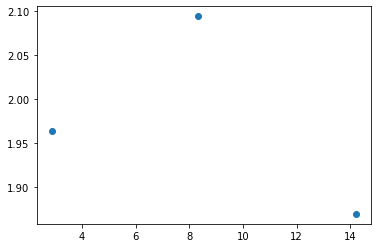

In [ ]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1])

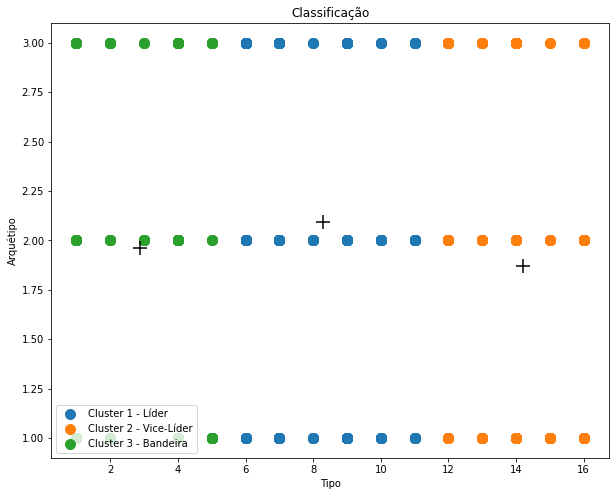

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df1.values[cluster_pred==0, 0], df1.values[cluster_pred==0, 1],s=100, label='Cluster 1 - Líder')
plt.scatter(df1.values[cluster_pred==1, 0], df1.values[cluster_pred==1, 1],s=100, label='Cluster 2 - Vice-Líder')
plt.scatter(df1.values[cluster_pred==2, 0], df1.values[cluster_pred==2, 1],s=100, label='Cluster 3 - Bandeira')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker='+', s=200, c='black')
plt.legend()
plt.title('Classificação')
plt.xlabel('Tipo')
plt.ylabel('Arquétipo')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(df1['Arquetipo'], df1['Tipo'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_data = pca.fit_transform(df)
pca_data[:5]

array([[8.06491894, 1.45168499],
       [8.06491894, 1.45168499],
       [8.06491894, 1.45168499],
       [8.06491894, 1.45168499],
       [8.06491894, 1.45168499]])

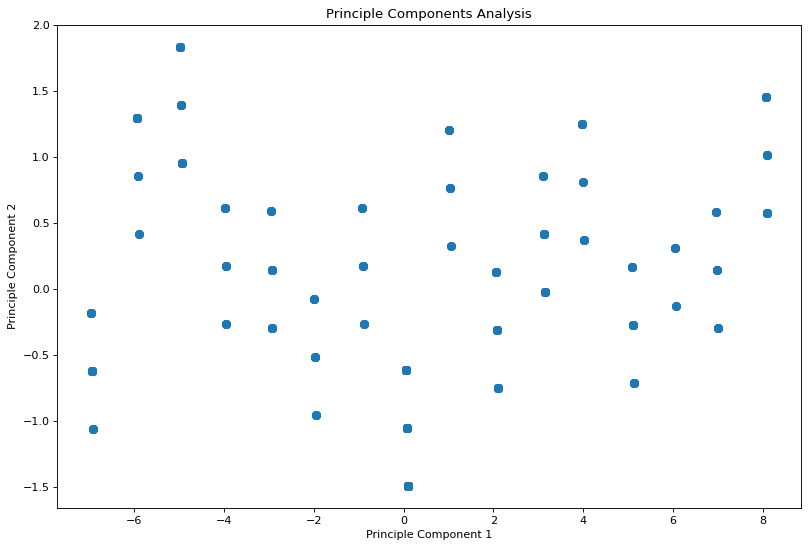

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Principle Components Analysis")
plt.show()

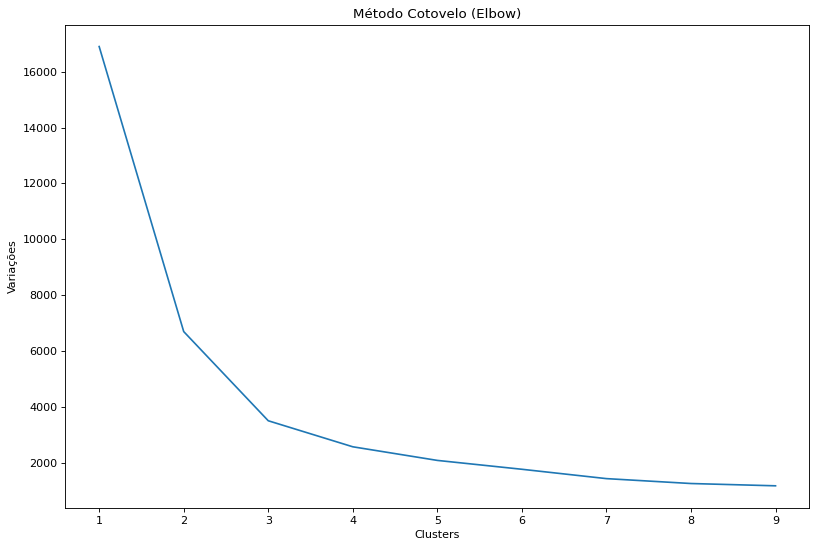

In [ ]:
variacoes = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,10), variacoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()

In [ ]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [ ]:
cluster_pred = pd.Series(kmeans_final.fit_predict(df))
cluster_pred

0      2
1      2
2      2
3      2
4      2
      ..
793    1
794    1
795    1
796    1
797    1
Length: 798, dtype: int32

In [ ]:
cluster_pred.value_counts()

0    324
1    252
2    222
dtype: int64

In [ ]:
centroids = kmeans_final.cluster_centers_
centroids_pca = pca.transform(centroids)

In [ ]:
pca_dataframe = pd.DataFrame(pca_data, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = cluster_pred
pca_dataframe.sample(10)

,PCA 1,PCA 2,Cluster
132,0.058119,-0.612058,0
650,2.099666,-0.749202,0
597,-1.959627,-0.951926,0
203,2.063211,0.129819,0
363,6.052015,0.310473,2
178,8.064919,1.451685,2
295,2.081438,-0.309691,0
180,8.064919,1.451685,2
687,-1.959627,-0.951926,0
349,-6.943064,-0.623142,1


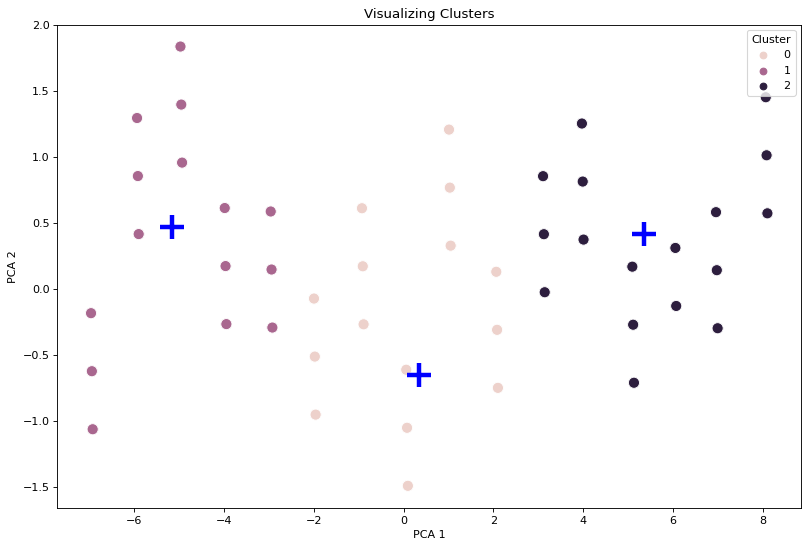

In [ ]:
plt.rcParams["figure.dpi"] = 80
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Cluster", data=pca_dataframe, s=100)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.title("Visualizing Clusters")
plt.show()

In [1]:
df.head()

NameError: ignored